<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/Door_Open_Close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
from tensorflow import keras
import zipfile
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from tensorflow.keras.preprocessing import image

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
local_zip= '/content/drive/My Drive/datasets/Images.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
train_door_c_dir= os.path.join('/content/Images/Train/Door Close')
train_door_o_dir= os.path.join('/content/Images/Train/Door Open')
test_door_c_dir= os.path.join('/content/Images/Test/Door Close')
test_door_o_dir= os.path.join('/content/Images/Test/Door Open')

In [6]:
print('Total train door close images: ',len(os.listdir(train_door_c_dir)))
print('Total train door open images: ',len(os.listdir(train_door_o_dir)))
print('Total test door close images: ',len(os.listdir(test_door_c_dir)))
print('Total test door open images: ',len(os.listdir(test_door_o_dir)))

Total train door close images:  501
Total train door open images:  391
Total test door close images:  70
Total test door open images:  59


In [7]:
! pip install -q tensorflow-model-optimization

     |████████████████████████████████| 174kB 3.3MB/s 
     |████████████████████████████████| 296kB 40.3MB/s 


In [0]:
from tensorflow_model_optimization.sparsity import keras as sparsity

In [9]:
epochs = 15
end_step = np.ceil(1.0 * 28 / 5).astype(np.int32) * epochs
print('End step: ' + str(end_step))

End step: 90


In [0]:
pruning_params = {
      'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.30,
                                                   final_sparsity=0.90,
                                                   begin_step=21,
                                                   end_step=end_step,
                                                   frequency=100)
}

In [11]:
tf.keras.backend.clear_session()

model= keras.Sequential([
                         sparsity.prune_low_magnitude(keras.layers.Conv2D(16,(7,7), activation='relu', padding='same', input_shape=(300,300,3)),**pruning_params),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.BatchNormalization(axis= 3),
                         sparsity.prune_low_magnitude(keras.layers.Conv2D(32,(5,5), activation='relu'),**pruning_params),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.Dropout(0.4),
                         sparsity.prune_low_magnitude(keras.layers.Conv2D(32,(3,3), activation='relu'),**pruning_params),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.BatchNormalization(axis= 3),
                         sparsity.prune_low_magnitude(keras.layers.Conv2D(64,(5,5), activation='relu'),**pruning_params),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.Dropout(0.4),
                         sparsity.prune_low_magnitude(keras.layers.DepthwiseConv2D((3, 3), (1, 1), activation = "relu"),**pruning_params),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.Dropout(0.4),
                         keras.layers.Flatten(),
                         sparsity.prune_low_magnitude(keras.layers.Dense(512, activation='relu', activity_regularizer=keras.regularizers.l2(0.01)),**pruning_params),
                         keras.layers.Dropout(0.4),
                         sparsity.prune_low_magnitude(keras.layers.Dense(256, activation='relu', activity_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)),**pruning_params),
                         keras.layers.Dropout(0.4),
                         keras.layers.Dense(2, activation='sigmoid')
                         ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Instructions for updating:
Please use `layer.add_weight` method instead.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv2d ( (None, 300, 300, 16)      4722      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 16)      64        
_________________________________________________________________
prune_low_magnitude_conv2d_1 (None, 146, 146, 32)      25634     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________

# Visualization of convolutional layers before training



=======================------------------------------Image 1----------------------================================


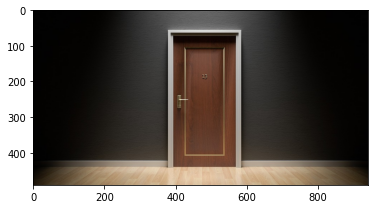

==================================Layer 0========================================


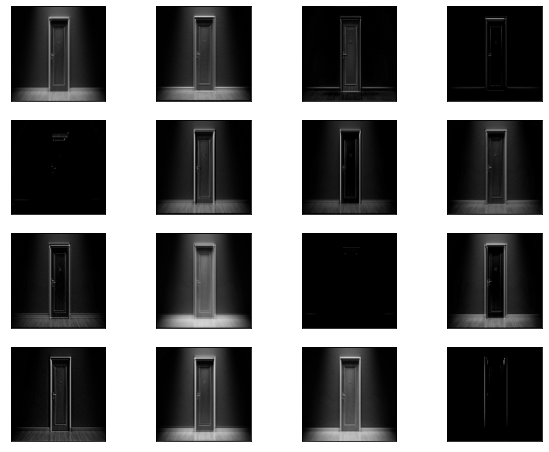

==================================Layer 3========================================


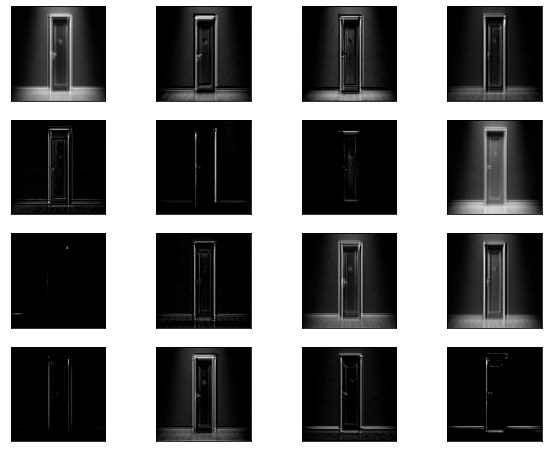

==================================Layer 6========================================


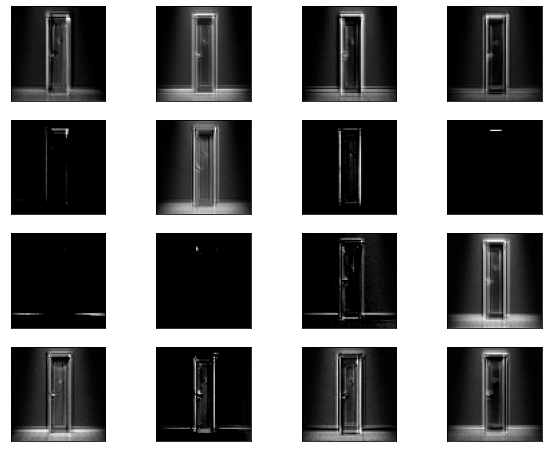

==================================Layer 9========================================


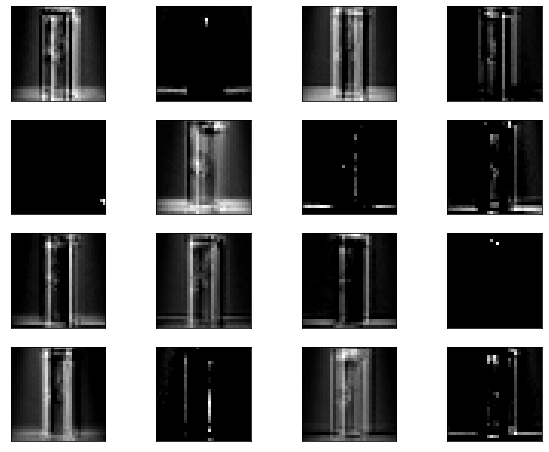

==================================Layer 12========================================


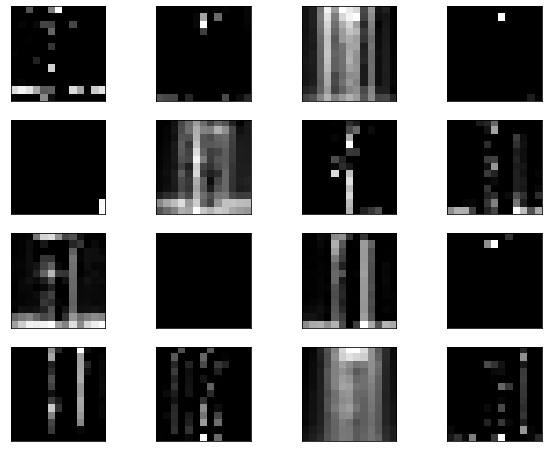



=======================------------------------------Image 2----------------------================================


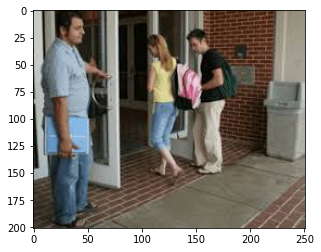

==================================Layer 0========================================


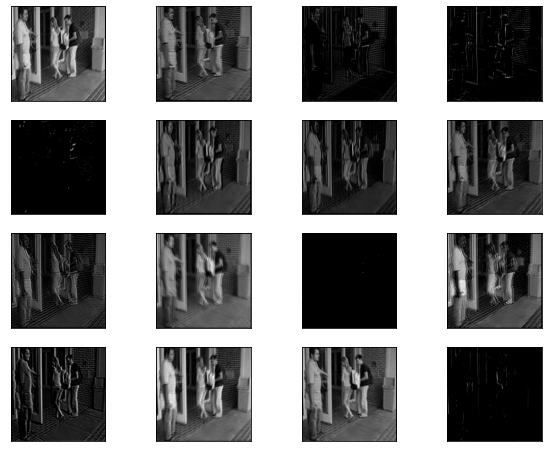

==================================Layer 3========================================


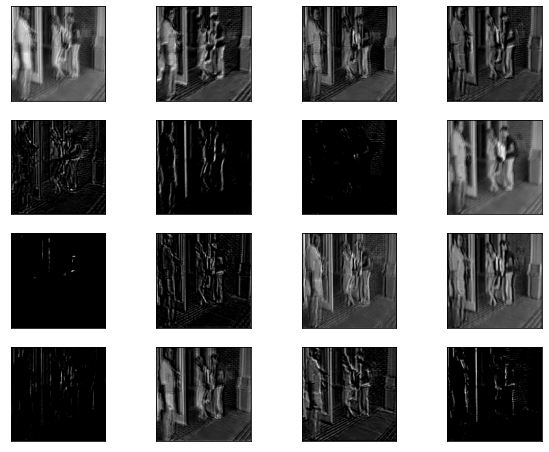

==================================Layer 6========================================


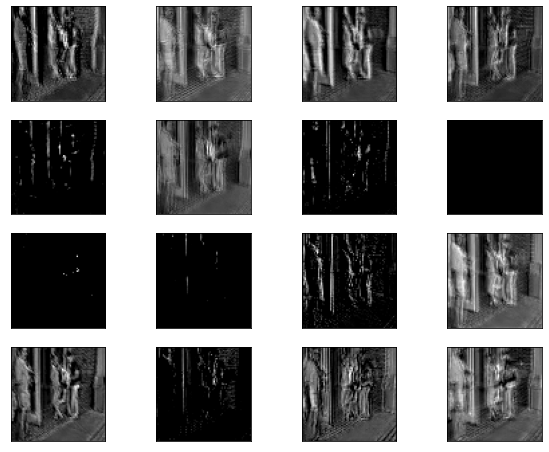

==================================Layer 9========================================


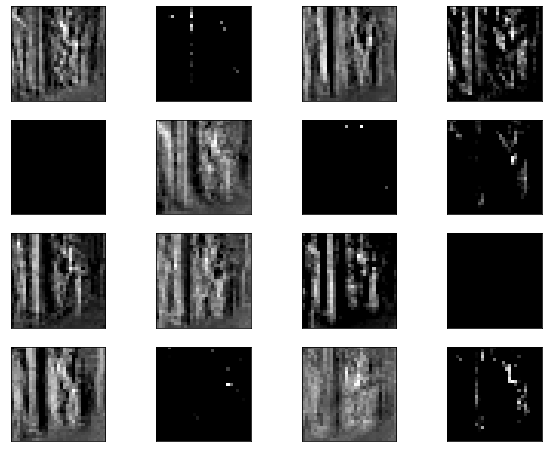

==================================Layer 12========================================


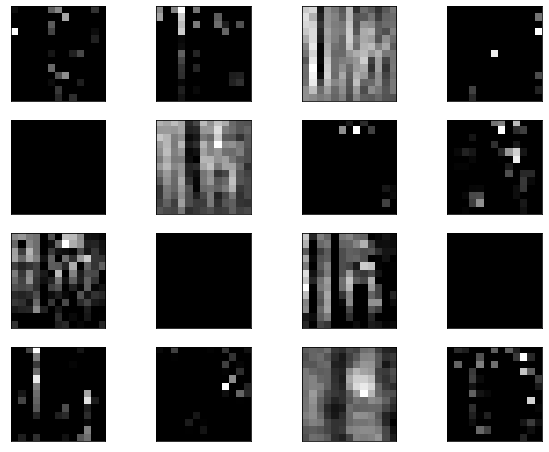



=======================------------------------------Image 3----------------------================================


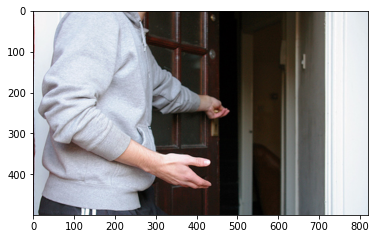

==================================Layer 0========================================


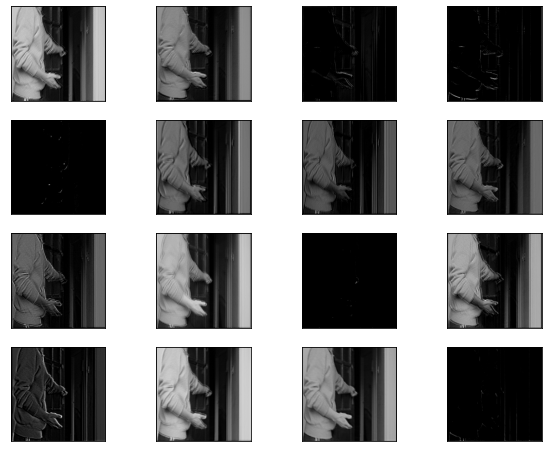

==================================Layer 3========================================


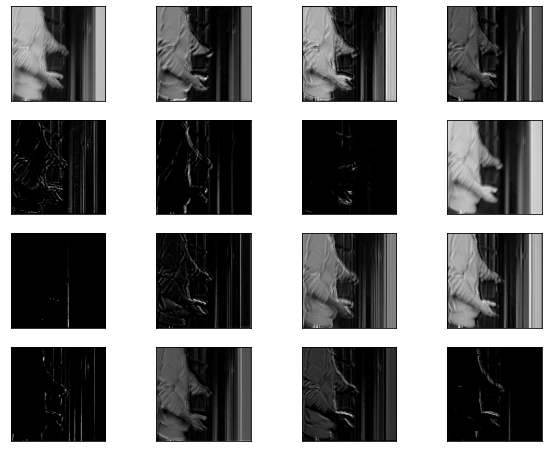

==================================Layer 6========================================


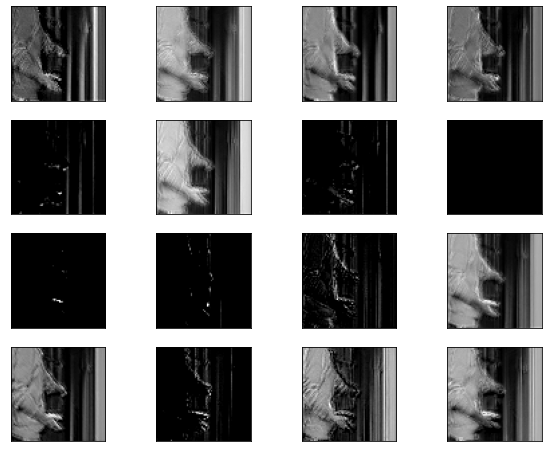

==================================Layer 9========================================


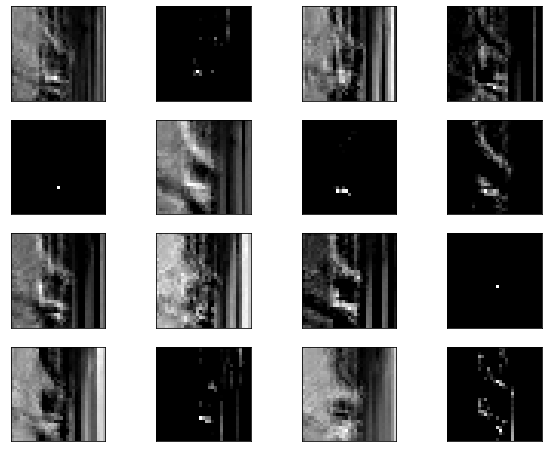

==================================Layer 12========================================


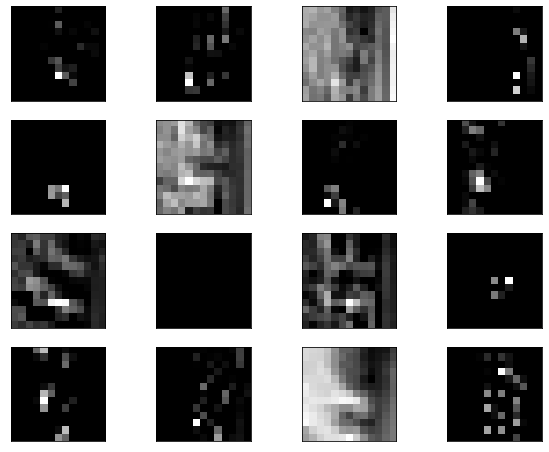



=======================------------------------------Image 4----------------------================================


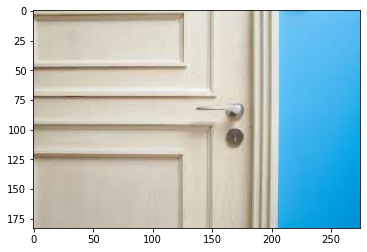

==================================Layer 0========================================


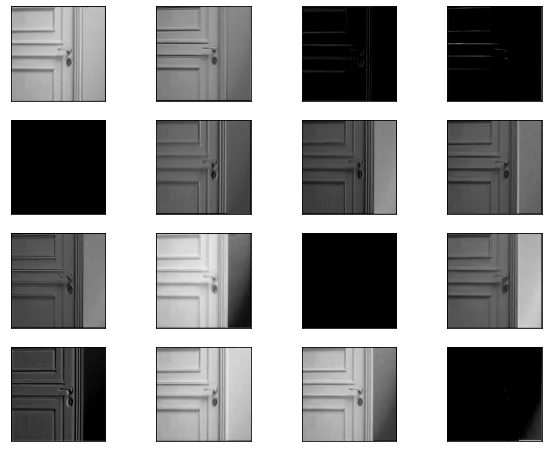

==================================Layer 3========================================


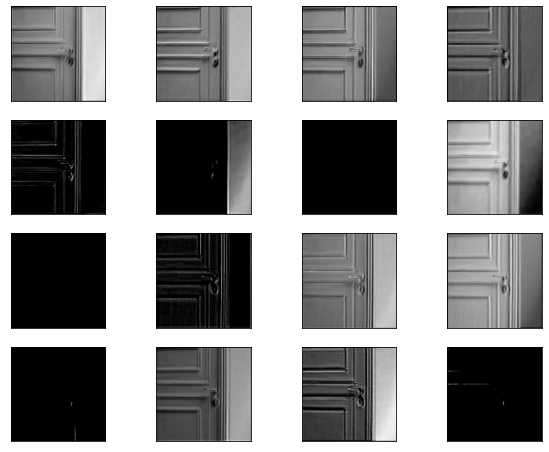

==================================Layer 6========================================


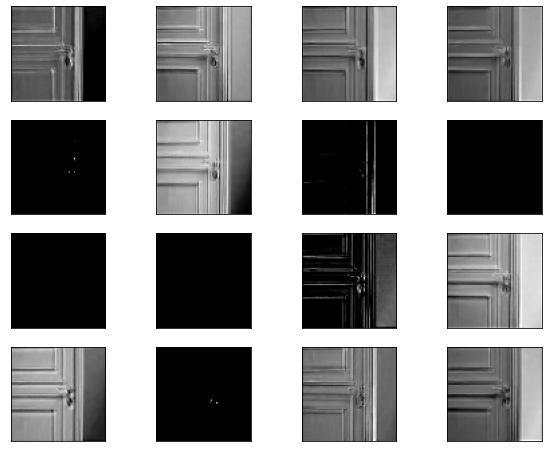

==================================Layer 9========================================


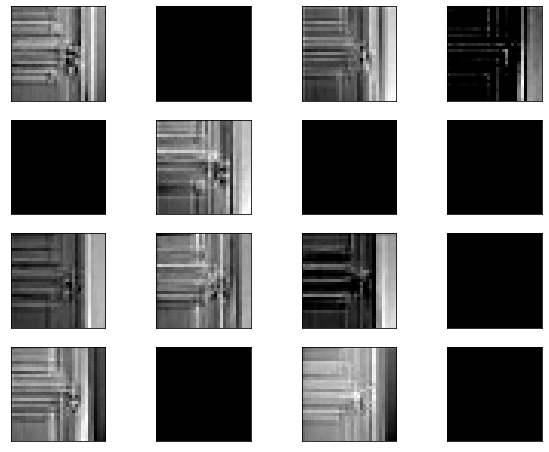

==================================Layer 12========================================


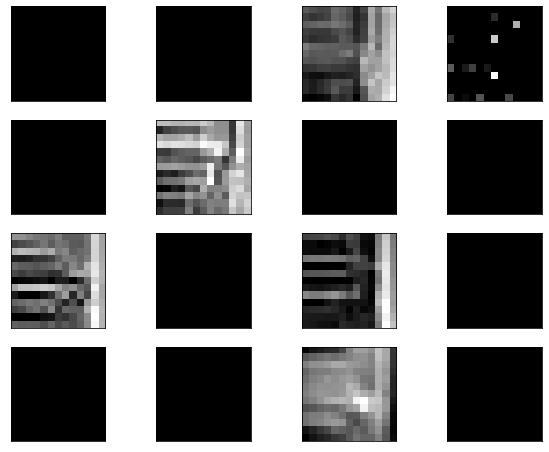



=======================------------------------------Image 5----------------------================================


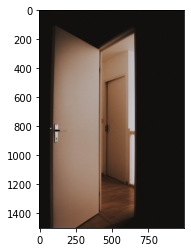

==================================Layer 0========================================


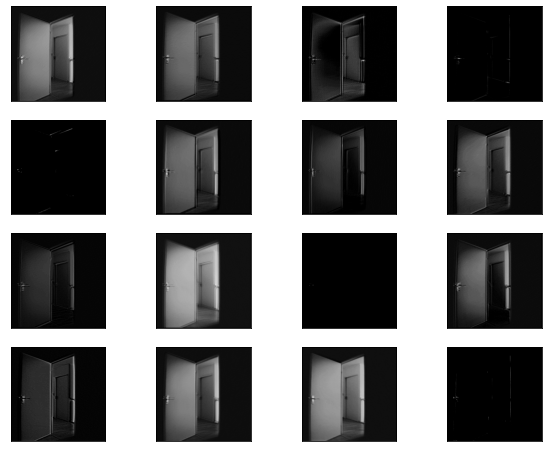

==================================Layer 3========================================


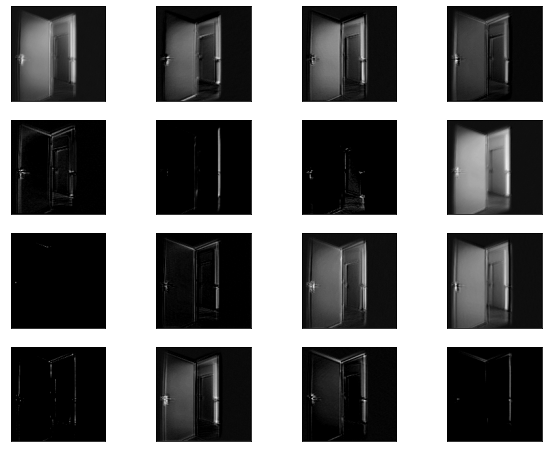

==================================Layer 6========================================


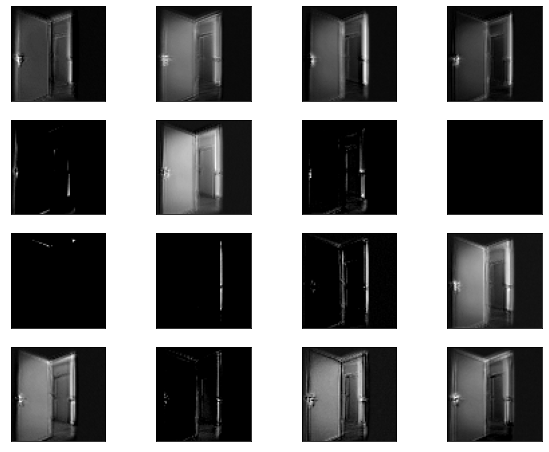

==================================Layer 9========================================


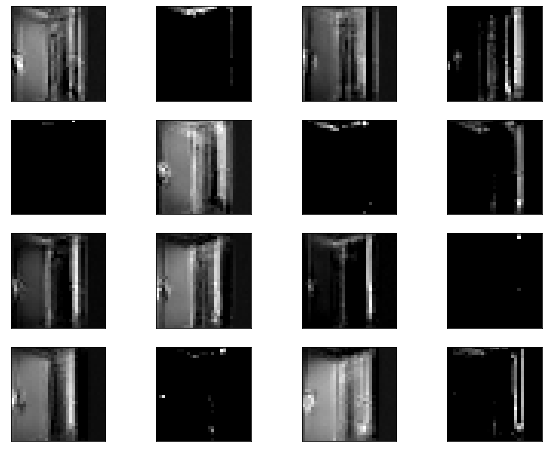

==================================Layer 12========================================


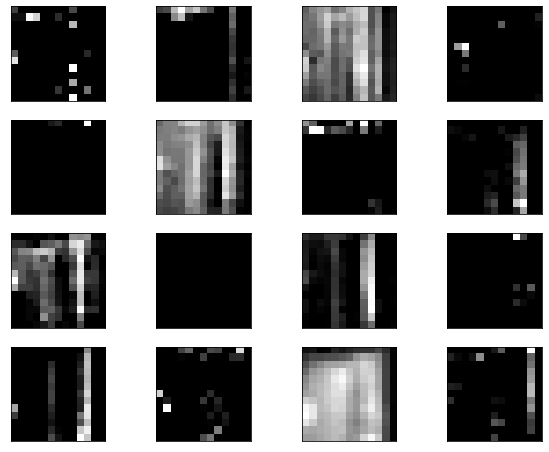



=======================------------------------------Image 6----------------------================================


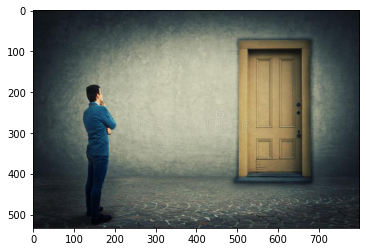

==================================Layer 0========================================


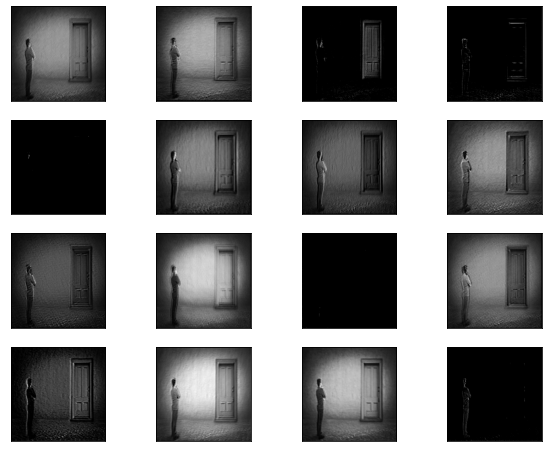

==================================Layer 3========================================


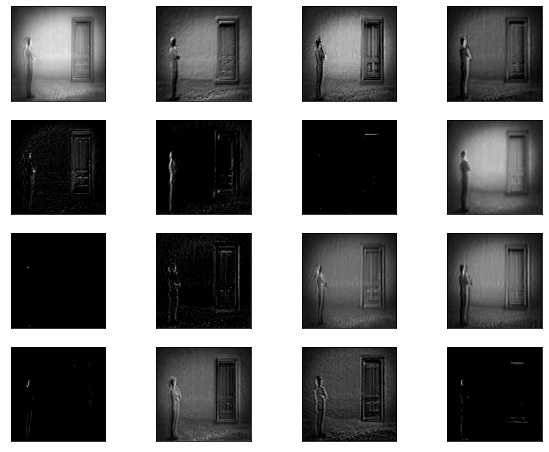

==================================Layer 6========================================


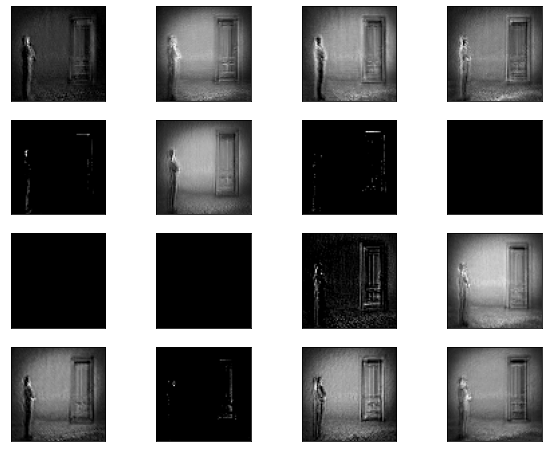

==================================Layer 9========================================


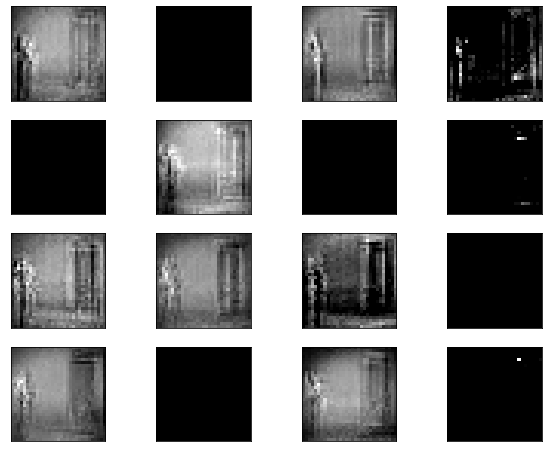

==================================Layer 12========================================


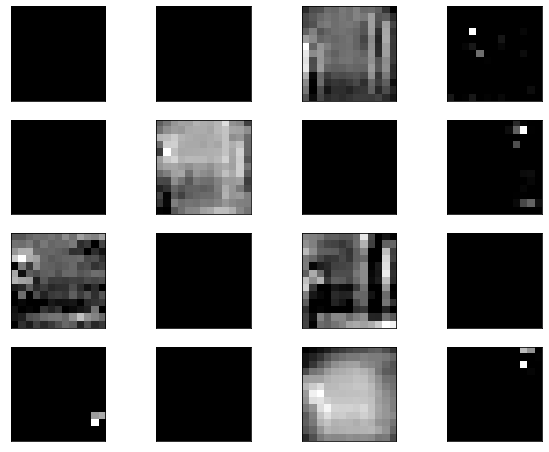

In [14]:
for j in range(1,7):
	print('\n\n=======================------------------------------Image '+str(j)+'----------------------================================')
	img=mpimg.imread('image'+str(j)+'.jpg')
	imgplot = plt.imshow(img)
	plt.show()
	for i in range(0,13,3):
		model1 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[i].output)
		# load the image with the required shape
		img = image.load_img('image'+str(j)+'.jpg', target_size=(300,300))
		# convert the image to an array
		img = image.img_to_array(img)
		# expand dimensions so that it represents a single 'sample'
		img = np.expand_dims(img, axis=0)
		# prepare the image (e.g. scale pixel values for the vgg)
		images= np.vstack([img])
		# get feature map for first hidden layer
		feature_maps = model1.predict(images)
		print('==================================Layer '+str(i)+'========================================')
		ix = 1
		fig = plt.figure(figsize=(10,8))
		for _ in range(4):
			for _ in range(4):
				ax= plt.subplot(4, 4, ix)

				ax.set_xticks([])
				ax.set_yticks([])
				# plot filter channel in grayscale
				plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
				ix += 1
		# show the figure
		plt.show()

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_gen= train_datagen.flow_from_directory( '/content/Images/Train',
                                            target_size=(300,300),
                                            batch_size=9,
                                            class_mode='categorical')

test_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_gen= test_datagen.flow_from_directory( '/content/Images/Test',
                                            target_size=(300,300),
                                            batch_size=3,
                                            class_mode='categorical')

Found 892 images belonging to 2 classes.
Found 129 images belonging to 2 classes.


In [0]:
class myCall(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.9):
      print('\nThe Training is Cancelled.....')
      self.model.stop_training= True

callbacks = [
    sparsity.UpdatePruningStep(),
    myCall()
] 

In [18]:
history= model.fit_generator( train_gen,
                   steps_per_epoch=50,
                   epochs=50,
                   validation_data= test_gen,
                   validation_steps= 50,
                   verbose=2,
                  callbacks=[callbacks] )

Epoch 1/50
50/50 - 29s - loss: 0.6901 - acc: 0.5333 - val_loss: 0.6926 - val_acc: 0.5467
Epoch 2/50
50/50 - 28s - loss: 0.6996 - acc: 0.5498 - val_loss: 0.6907 - val_acc: 0.5533
Epoch 3/50
50/50 - 28s - loss: 0.6930 - acc: 0.5133 - val_loss: 0.6920 - val_acc: 0.5200
Epoch 4/50
50/50 - 28s - loss: 0.6924 - acc: 0.5294 - val_loss: 0.6872 - val_acc: 0.5467
Epoch 5/50
50/50 - 29s - loss: 0.6900 - acc: 0.5600 - val_loss: 0.6872 - val_acc: 0.5600
Epoch 6/50
50/50 - 28s - loss: 0.6927 - acc: 0.5249 - val_loss: 0.6843 - val_acc: 0.5533
Epoch 7/50
50/50 - 28s - loss: 0.6908 - acc: 0.5556 - val_loss: 0.6877 - val_acc: 0.5200
Epoch 8/50
50/50 - 28s - loss: 0.6859 - acc: 0.5656 - val_loss: 0.6846 - val_acc: 0.5533
Epoch 9/50
50/50 - 28s - loss: 0.6797 - acc: 0.5778 - val_loss: 0.6733 - val_acc: 0.5400
Epoch 10/50
50/50 - 28s - loss: 0.6799 - acc: 0.5430 - val_loss: 0.6687 - val_acc: 0.5400
Epoch 11/50
50/50 - 28s - loss: 0.6984 - acc: 0.5689 - val_loss: 0.6812 - val_acc: 0.5467
Epoch 12/50
50/50 -

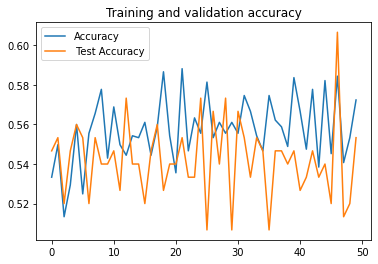

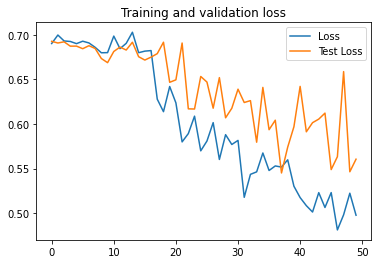

In [19]:
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(acc))
plt.plot(epochs, acc, label='Accuracy')
plt.plot(epochs, val_acc, label=' Test Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, label='Loss')
plt.plot(epochs, val_loss, label='Test Loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.show()

In [0]:
model1 = sparsity.strip_pruning(model)

In [0]:
model1.save('Door_Model.h5')

Saving door.png to door.png
Saving download.jpg to download.jpg
Saving holding-door.jpg to holding-door.jpg
Saving images.jpg to images.jpg
Saving photo-1535556572967-276cd0ad5cba.jpg to photo-1535556572967-276cd0ad5cba.jpg
Saving young-businessman-standing-dark-room-front-closed-door-thinking-his-next-step-entrance-to-unknown-difficult-decision-115176147.jpg to young-businessman-standing-dark-room-front-closed-door-thinking-his-next-step-entrance-to-unknown-difficult-decision-115176147.jpg


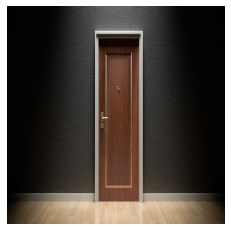

[[1. 1.]]
Open Door


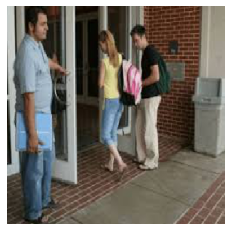

[[1. 1.]]
Open Door


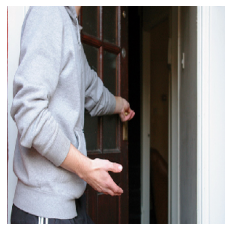

[[1. 1.]]
Open Door


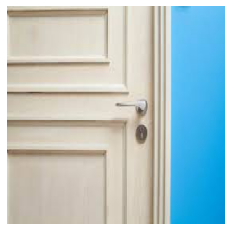

[[1. 1.]]
Open Door


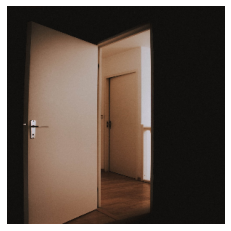

[[1. 1.]]
Open Door


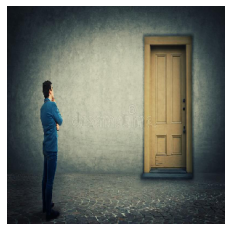

[[1. 1.]]
Open Door


In [24]:
uploaded= files.upload()

for fn in uploaded.keys():
  # predict image
  path='/content/' + fn
  img= image.load_img(path, target_size=(300,300))
  plt.axis('off')
  plt.imshow(img)
  plt.show()
  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  
  images= np.vstack([x])
  classes= model1.predict(images, batch_size=10)
  print(classes)
  if(np.any(classes[0]==1.)):
    print('Open Door')
    
  else:
    print('Close Door')
  

In [20]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 prune_low_magnitude_conv2d (None, 300, 300, 16)
3 prune_low_magnitude_conv2d_1 (None, 146, 146, 32)
6 prune_low_magnitude_conv2d_2 (None, 71, 71, 32)
9 prune_low_magnitude_conv2d_3 (None, 31, 31, 64)
12 prune_low_magnitude_depthwise_conv2d (None, 13, 13, 64)


# Visualization of convolutional layers after training



=======================------------------------------Image 1----------------------================================


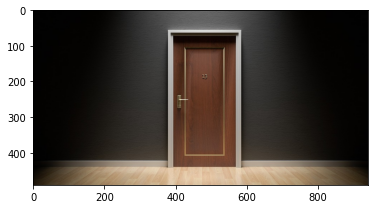

==================================Layer 0========================================


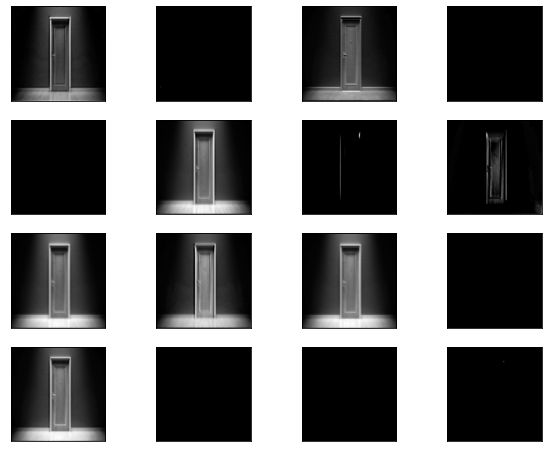

==================================Layer 3========================================


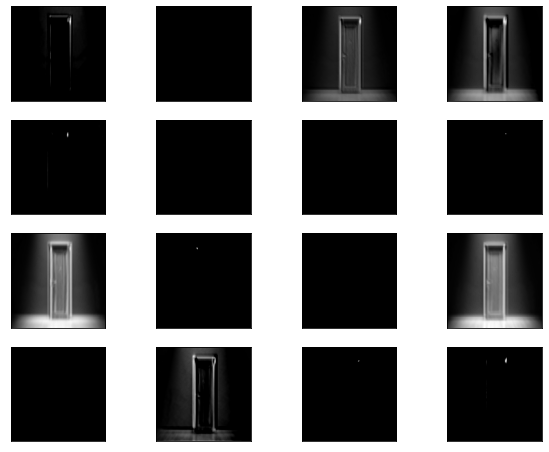

==================================Layer 6========================================


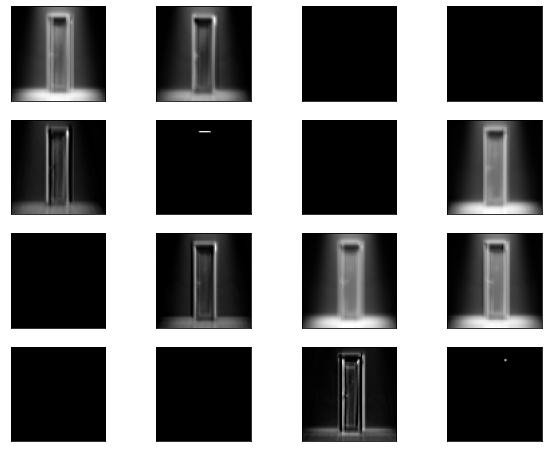

==================================Layer 9========================================


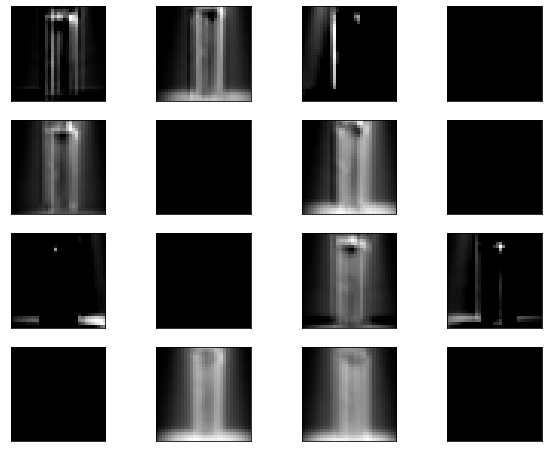

==================================Layer 12========================================


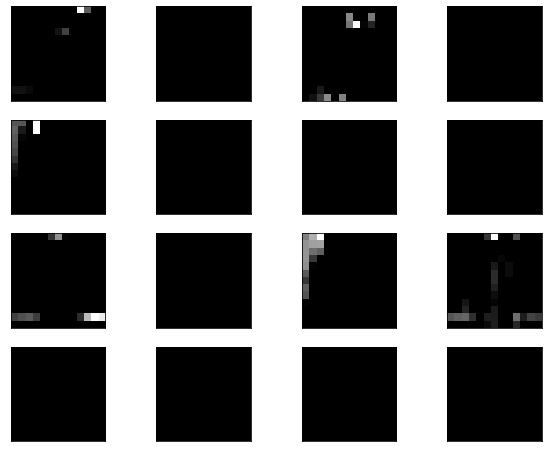



=======================------------------------------Image 2----------------------================================


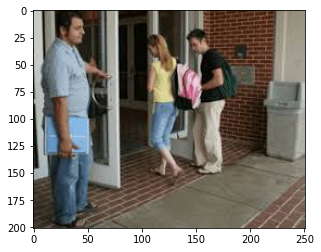

==================================Layer 0========================================


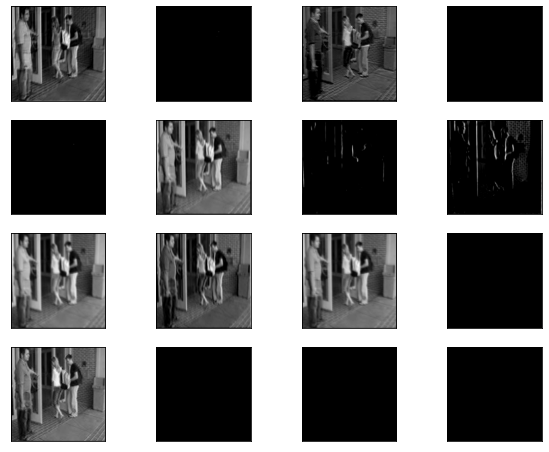

==================================Layer 3========================================


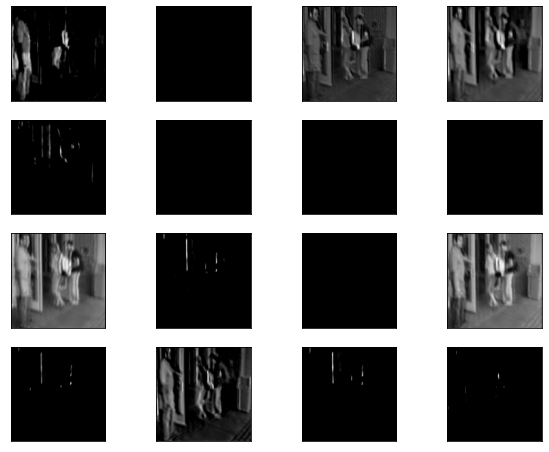

==================================Layer 6========================================


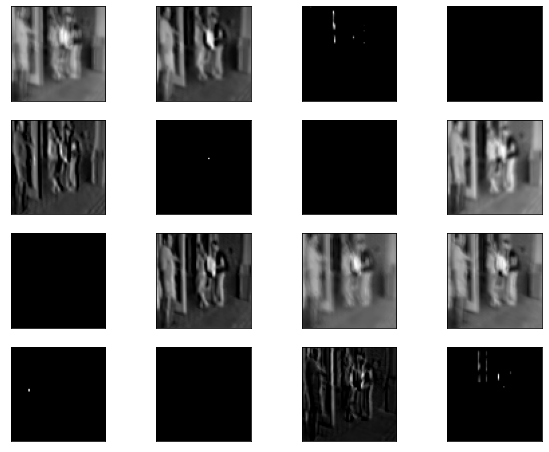

==================================Layer 9========================================


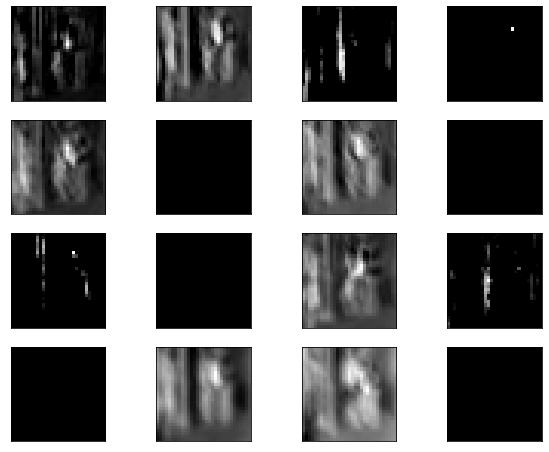

==================================Layer 12========================================


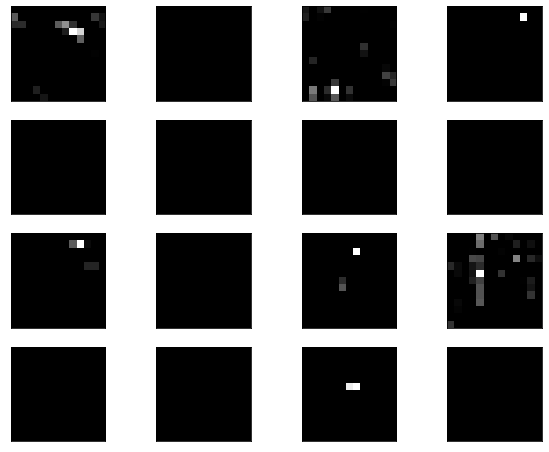



=======================------------------------------Image 3----------------------================================


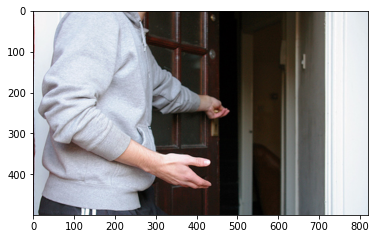

==================================Layer 0========================================


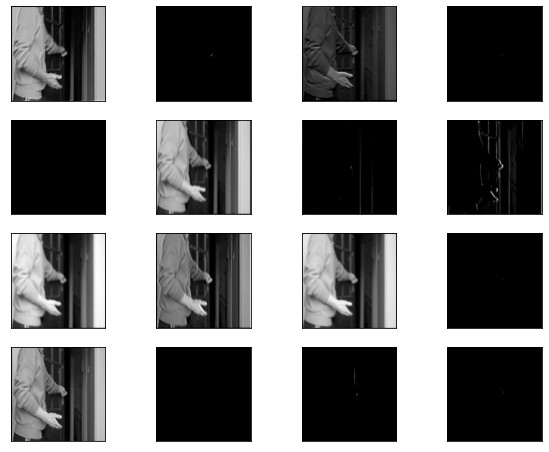

==================================Layer 3========================================


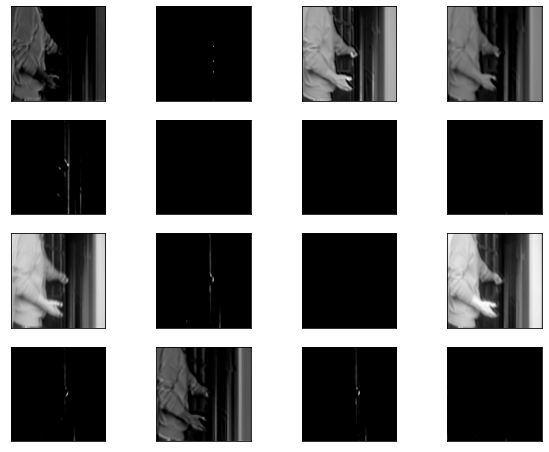

==================================Layer 6========================================


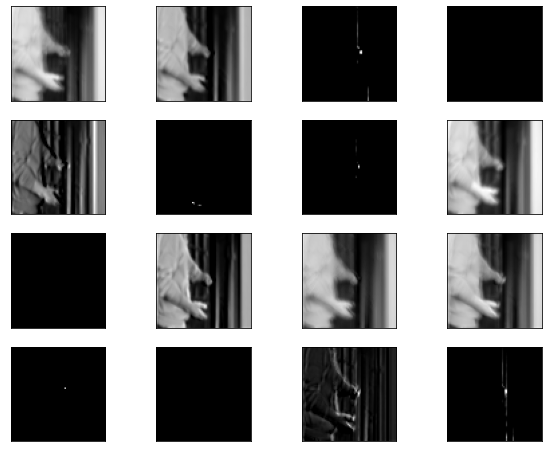

==================================Layer 9========================================


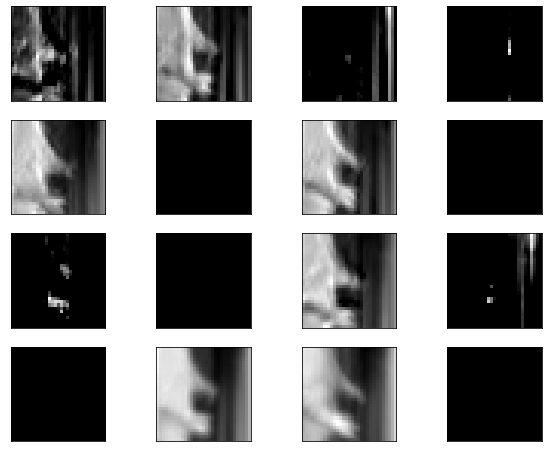

==================================Layer 12========================================


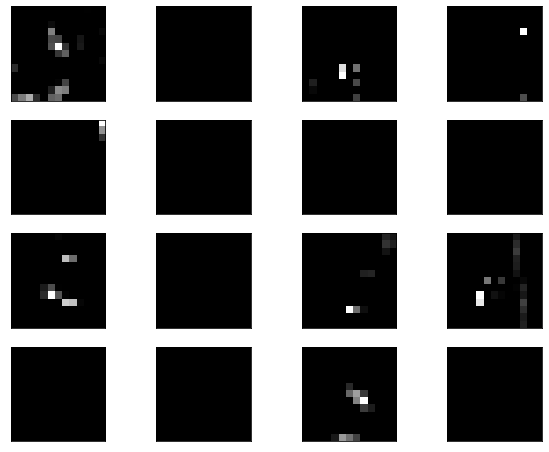



=======================------------------------------Image 4----------------------================================


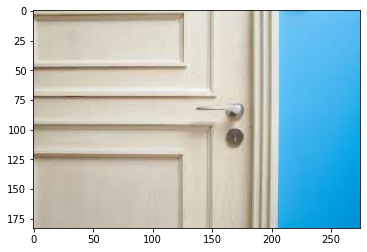

==================================Layer 0========================================


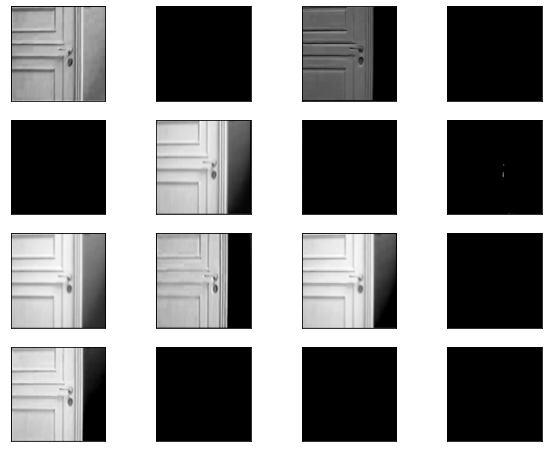

==================================Layer 3========================================


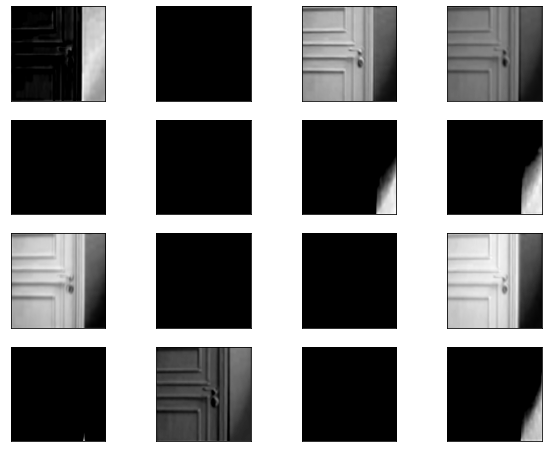

==================================Layer 6========================================


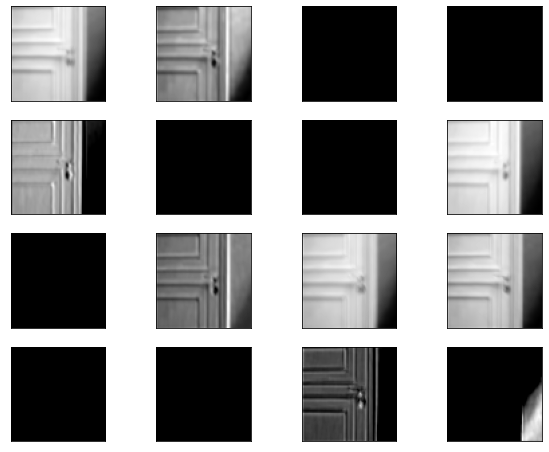

==================================Layer 9========================================


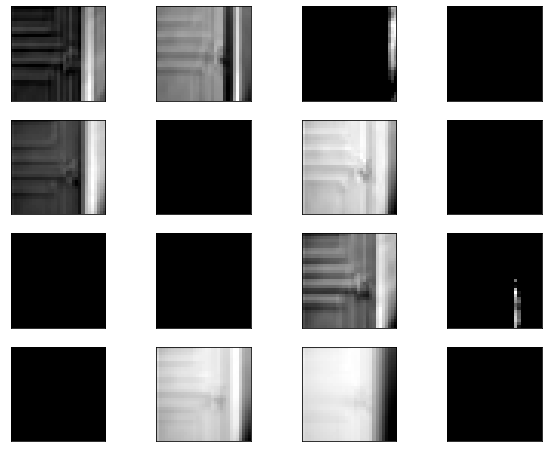

==================================Layer 12========================================


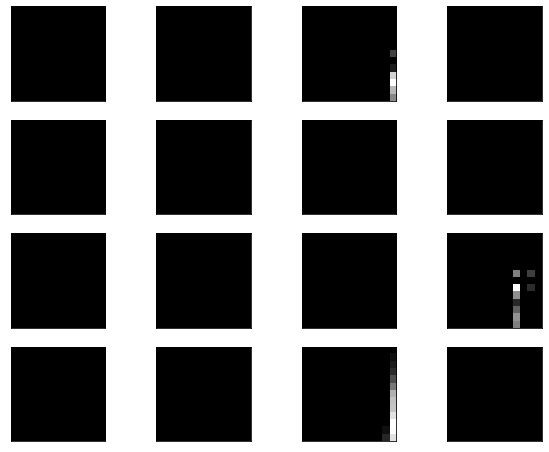



=======================------------------------------Image 5----------------------================================


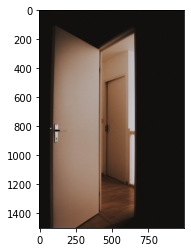

==================================Layer 0========================================


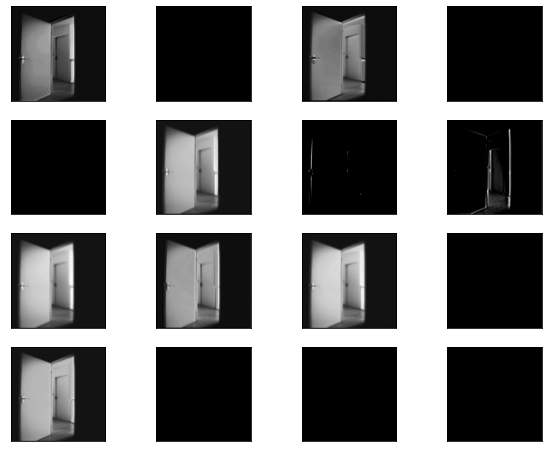

==================================Layer 3========================================


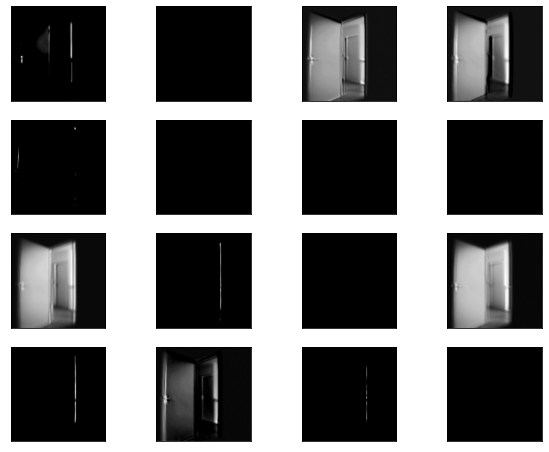

==================================Layer 6========================================


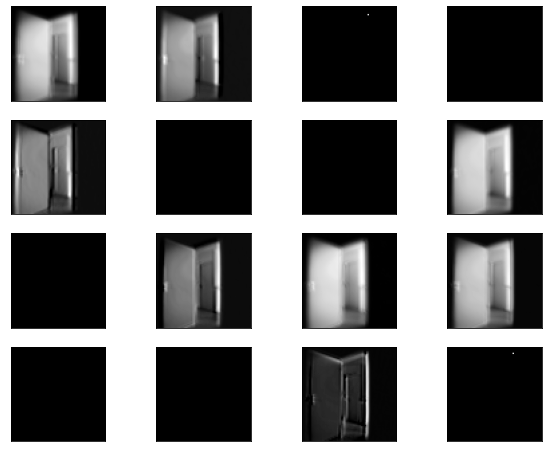

==================================Layer 9========================================


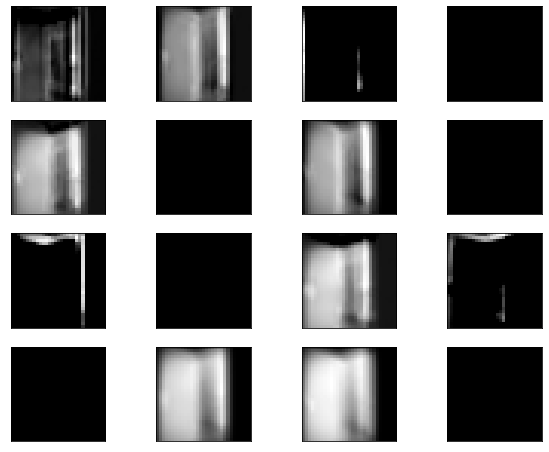

==================================Layer 12========================================


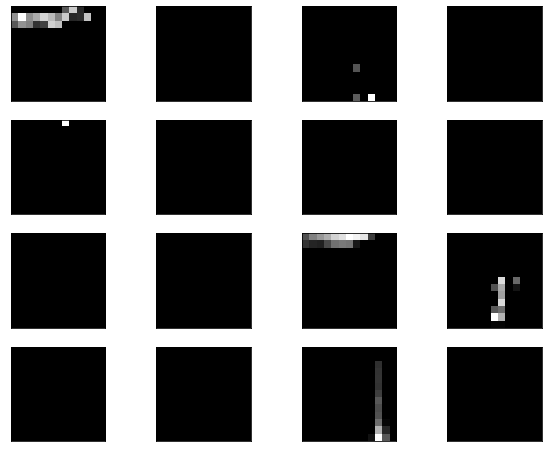



=======================------------------------------Image 6----------------------================================


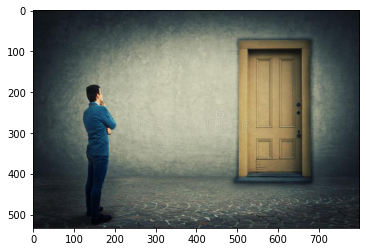

==================================Layer 0========================================


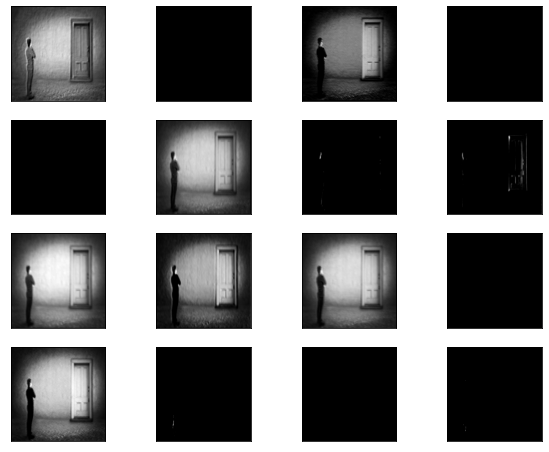

==================================Layer 3========================================


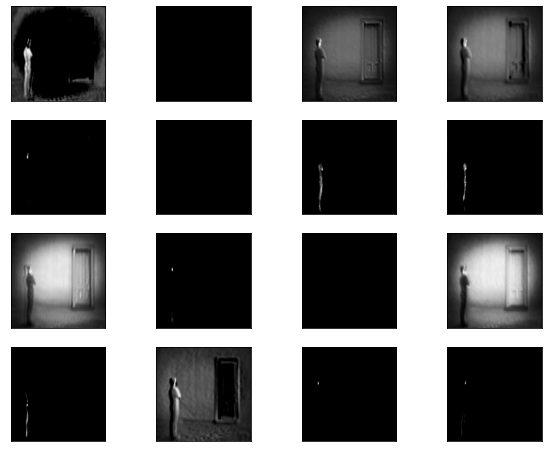

==================================Layer 6========================================


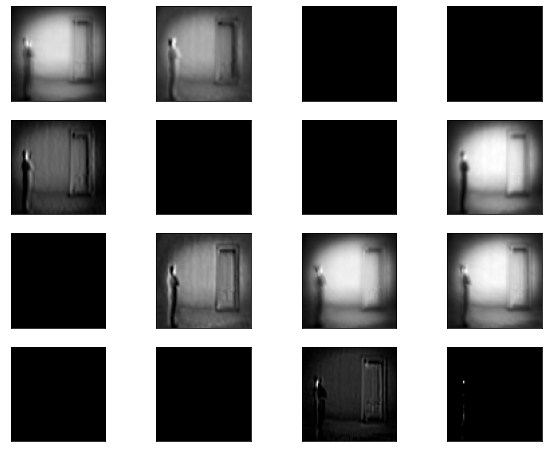

==================================Layer 9========================================


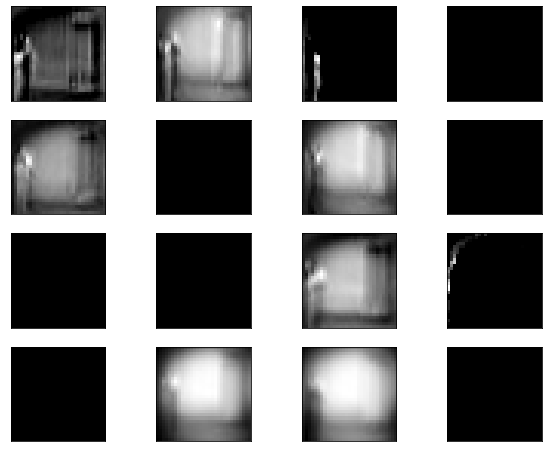

==================================Layer 12========================================


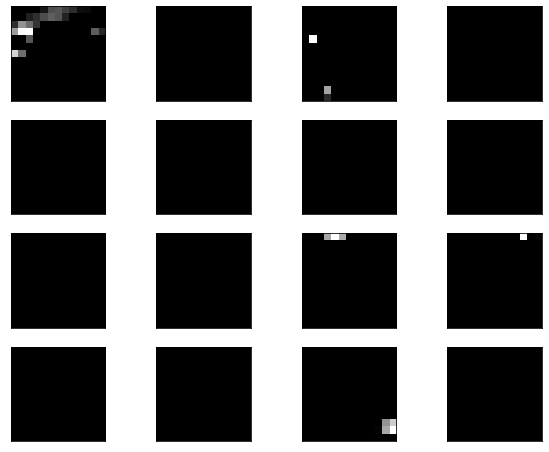

In [21]:
for j in range(1,7):
	print('\n\n=======================------------------------------Image '+str(j)+'----------------------================================')
	img=mpimg.imread('image'+str(j)+'.jpg')
	imgplot = plt.imshow(img)
	plt.show()
	for i in range(0,13,3):
		model1 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[i].output)
		# load the image with the required shape
		img = image.load_img('image'+str(j)+'.jpg', target_size=(300,300))
		# convert the image to an array
		img = image.img_to_array(img)
		# expand dimensions so that it represents a single 'sample'
		img = np.expand_dims(img, axis=0)
		# prepare the image (e.g. scale pixel values for the vgg)
		images= np.vstack([img])
		# get feature map for first hidden layer
		feature_maps = model1.predict(images)
		print('==================================Layer '+str(i)+'========================================')
		ix = 1
		fig = plt.figure(figsize=(10,8))
		for _ in range(4):
			for _ in range(4):
				ax= plt.subplot(4, 4, ix)

				ax.set_xticks([])
				ax.set_yticks([])
				# plot filter channel in grayscale
				plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
				ix += 1
		# show the figure
		plt.show()